In [1]:
#connect google colab with google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/train.zip')

#extracts the files into the /tmp folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [3]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/test.zip')

#extracts the files into the /tmp folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [4]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation.zip')

#extracts the files into the /tmp folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score
#from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import time
import sys
import math
#from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications import InceptionV3

In [6]:
#initializing variables
BATCH_SIZE = 32
IMAGE_SIZE = 299
CHANNELS=3
EPOCHS=30
num_classes=2

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from keras.applications.inception_v3 import InceptionV3, preprocess_input


#input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

train_data_dir = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'
validation_data_dir = '/content/gdrive/MyDrive/MajorProject/br35hdataset/validation'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255    
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 14400 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [9]:
# import required libraries
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# Define input shape
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Load InceptionV3 model with pre-trained weights from ImageNet
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in inception.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [10]:
model = Sequential()

# Add the InceptionV3 model as the first layer
model.add(inception)

# Add a Flatten layer to convert the output of the Inception V3 model to a 1D vector
#model.add(Flatten(input_shape=inception.output_shape[1:]))
model.add(Flatten())

# Add a Dense layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add the final Dense layer with 2 units and softmax activation for binary classification
model.add(Dense(2, activation='softmax'))

# Reshape the output of the InceptionV3 model to match the input shape of the custom model
x = inception.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

In [11]:
# concatenate the Inception V3 model with the custom model
model = Model(inputs=inception.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# train the model
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    verbose=1,
    epochs=EPOCHS)

Epoch 1/30
245/450 [===============>..............] - ETA: 59s - loss: 0.1002 - accuracy: 0.9593

KeyboardInterrupt: ignored

In [ ]:
# Load the test folder
test_data_dir = '/content/gdrive/MyDrive/MajorProject/br35hdataset/test'

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

In [14]:
# evaluate the model on the test set
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-14-2dded4200935>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.3421100080013275
Test accuracy: 0.9166666865348816


Saving the model

In [15]:
from tensorflow.keras.models import save_model
model.save('/content/gdrive/MyDrive/MajorProject/inception-cnn.h5')

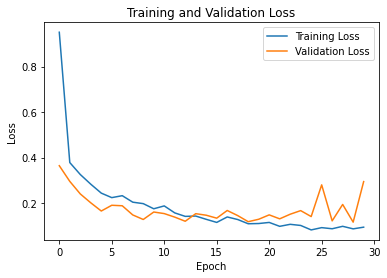

In [17]:
import matplotlib.pyplot as plt
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

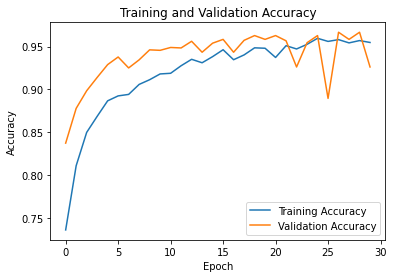

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

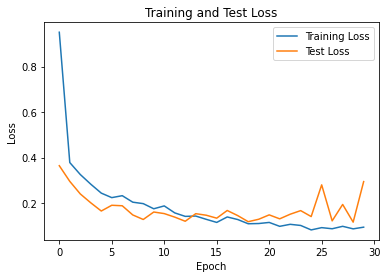

In [19]:
# Plot training and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

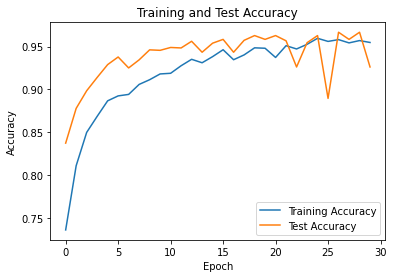

In [20]:
# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion matrix

57/57 [==============================] - 15s 244ms/step


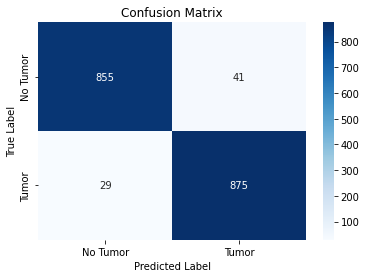

In [21]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test data
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [23]:
X_test, y_test = test_generator.next()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Convert the predicted labels to binary values (0 or 1)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate precision, recall, sensitivity, specificity, f1 score, and f beta score
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
sensitivity = recall
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
beta = 2
f_beta_score = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))
print("F1 Score: {:.4f}".format(f1_score))
print("F Beta Score: {:.4f}".format(f_beta_score))


1/1 [==============================] - 0s 96ms/step
Precision: 0.9552
Recall: 0.9679
Sensitivity: 0.9679
Specificity: 0.9542
F1 Score: 0.9615
F Beta Score: 0.9654
